In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import ArtistAnimation, FFMpegWriter

path_bousinessq = "./boussinesq.nc"
path_2dcylinder = "./cylinder2d.nc"

In [3]:
def loadDataset(path):
    return Dataset(path)

In [4]:
cylinder2D = loadDataset(path_2dcylinder)
boussinesq = loadDataset(path_bousinessq)
print(cylinder2D)
print(boussinesq)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creation_date: 12-Apr-2019 21:00:57
    grid: regular
    dimensions(sizes): xdim(640), ydim(80), tdim(1501), const(1)
    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim), float32 nu(const), float32 radius(const), float32 Re(const)
    groups: 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creation_date: 15-Apr-2019 13:19:03
    grid: regular
    dimensions(sizes): xdim(150), ydim(450), tdim(2001), const(1)
    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim), float32 radius(const), float32 obstacle_pos_x(const), float32 obstacle_pos_y(const)
    groups: 



## Info about the datasets

### Cylinder 2D

    dimensions(sizes): xdim(640), ydim(80), tdim(1501), const(1)

    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim), float32 nu(const),                             float32 radius(const), float32 Re(const)

### Bousinessq


    dimensions(sizes): xdim(150), ydim(450), tdim(2001), const(1)

    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim),
                           float32 radius(const), float32 obstacle_pos_x(const), float32 obstacle_pos_y(const)

### Accessing variables

    cylinder2D['variable_name']


In [5]:
type(cylinder2D['xdim'])
print(cylinder2D['u'].shape)
print(cylinder2D['tdim'].shape)

(1501, 80, 640)
(1501,)


In [6]:
data = cylinder2D

def velFromUV(data):
    
    u = data['u'][1000,:,:]
    v = data['v'][1000,:,:]

    vel = np.sqrt(u**2 + v**2)

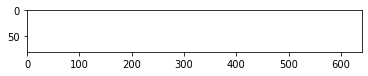

In [7]:
u = np.array(cylinder2D['u'])

fig, ax = plt.subplots()
ims = [[ax.imshow(u[i], animated=True)] for i in range(1, len(u))]

ani = ArtistAnimation(fig, ims, interval=1000 , blit=True, repeat_delay=1000)

# plt.show()

# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

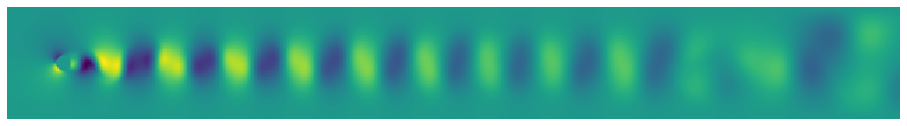

In [25]:
plt.matshow(data['v'][1000,:,:])
plt.axis('off')
plt.show()

```
% Create snapshot matrix
Nt = length(S(1,1,:));
S = reshape(permute(S, [3 2 1]), Nt, [ ]); % Reshape data into a matrix S with Nt rows
U = S - repmat(mean(S,1), Nt, 1); % Subtract the temporal mean from each row

% Create correlation matrix
C_s = (U*U')/(Nt-1);

% Solve eigenvalue problem
[A_s LAM_s] = eig(C_s,'vector');

% Sort eigenvalues and eigenvectors
[lambda_s,ilam_s] = sort(LAM_s,'descend');
A_s = A_s(:, ilam_s);

% These are the temporal modes
% Calculate spatial coefficients
PHI_s = U'*A_s;

% Reconstruction on mode k
k = 1; % for example
Utilde_k_s = A_s(:,k)*PHI_s(:,k)';

% Normalization to match direct and snapshot modes (optional)
PHI = normc(PHI_s);

% Spatial modes
A = U*PHI;

% Time coefficients
Utilde_k = A(:,k)*PHI(:,k)';
% Reconstruction on mode k
```

In [21]:
S = np.transpose(u, (1,2,0))
print(S.shape)
Nt = u.shape[0]
print(Nt)
U = 

(80, 640, 1501)
1501


In [4]:
from zipfile import ZipFile

url = "https://cgl.ethz.ch/Downloads/Data/ScientificData/cylinder2d_nc.zip"
file_name = "../data2/" + url.split('/')[-1]
with ZipFile(file_name, 'r') as zipObj:
   zipObj.extractall('temp')